# Current state of the project:
* Business Understanding
    * Business objectives presented
    * Success Criteria presented
	* Business Requirements presented
	
* Data Understanding
	* Identified variables
	* Analyzed the distribution of the variables
	* Checked for missing data
	* Checked for outliers
	* Checked data correlation
	* Checked for imbalances in the target variable  
  
* Data Preparation
	* Imputed missing data
	* Removed outliers
	* Removed highly correlated variables
	* Balanced the target variable

* We have already started implementing the models, but we have not yet compared them and selected the best one, which is why this part has not been included here at all.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from scipy import stats
import sklearn.metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from mixed_naive_bayes import MixedNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.metrics as metrics

# Current state:

# 1. Business understanding:

In today's telecommunications world, retaining a customer is a challenge that needs to be addressed before they decide to switch operators. The issue of customer loss, also known as "churn," is significant, requiring modern strategies. The "Churn Prediction" project aims to understand how customer departures impact the overall business and how to predict who might be next on the list of potential churners.

Losing customers is not just a loss of current revenue; it also means missing opportunities for future benefits from new services or development. Each customer is a valuable asset, and understanding their needs and expectations is crucial for industry strategy. Hence, predictive systems based on modern technologies are being developed. Data analysis helps identify patterns and signals that may indicate a customer is considering changing service providers.

In the context of the customer churn prediction project in the telecommunications industry, our focus is on a deep understanding of the industry context, which is crucial for an effective strategy. Objectives include not only analyzing the problem but also actively managing customer retention. This is directed towards specific business goals, such as reducing the customer churn rate or increasing overall retention. Additionally, ensuring access to historical customer data is crucial. Such an approach allows for better understanding of the problem and more effective action to maintain competitiveness and stable growth in the dynamic telecommunications industry.

We utilize the CRISP-DM model, enabling an organized approach to the data analysis process, from understanding the business context to implementing effective retention strategies. The CRISP-DM (Cross-Industry Standard Process for Data Mining) model provides a framework that contributes to systematic progress and achieving success in data analysis projects. Our priorities include:

* Business Objectives:

    * Understanding the impact of customer churn on revenues and retention efforts.
    * Developing predictive systems to foresee potential departures.
    * Implementing targeted campaigns to retain customers.

* Success Criteria:

    * Reduction of the customer churn rate by a specified percentage.
    * Increase in customer retention and overall revenues.

* Business Requirements:

    * Access to historical customer data.
    * Collaboration with the marketing and customer service teams during campaign 



# 2. Data Understanding

Looking at the raw data, we can categorize the variables into different types based on their nature:

1. Interval-Scaled Variables:

    * ACCOUNTLENGTH
    * NUMBERVMAILMESSAGES (Number of Voicemail Messages)
    * TOTALDAYMINUTES
    * TOTALDAYCALLS 
    * TOTALDAYCHARGE
    * TOTALEVEMINUTES (Total Evening Minutes)
    * TOTALEVECALLS (Total Evening Calls)
    * TOTALEVECHARGE (Total Evening Charge)
    * TOTALNIGHTMINUTES
    * TOTAL NIGHT CALLS
    * TOTAL NIGHT CHARGE
    * TOTAL INTL MINUTES (Total International Minutes)
    * TOTAL INTL CALLS (Total International Calls)
    * TOTAL INTL CHARGE (Total International Charge)
    * CUSTOMER SERVICE CALLS

2. Binary Variables:

    * INTERNATIONALPLAN
    * VOICEMAILPLAN
    * CHURN


In [2]:
df = pd.read_csv("./../churn_data.csv")
numerical_columns = df.select_dtypes(include=['float64']).columns
df.describe(include='all')

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,5000,4951.000000,4950,4950,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000
unique,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,No,NaN,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4293,NaN,4481,3638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,100.238295,NaN,NaN,7.763636,180.306625,100.038788,30.629386,200.679798,100.243838,17.048293,200.465697,99.932929,9.015240,10.259010,4.432525,2.772088,1.569091
std,NaN,39.718817,NaN,NaN,13.552928,53.926625,19.844529,9.148881,50.486434,19.837380,4.300503,50.498290,19.939450,2.276812,2.763712,2.448457,0.744552,1.305279
min,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,73.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.425000,87.000000,14.130000,167.000000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,NaN,100.000000,NaN,NaN,0.000000,180.100000,100.000000,30.600000,201.000000,101.000000,17.090000,200.550000,100.000000,9.010000,10.300000,4.000000,2.780000,1.000000
75%,NaN,127.000000,NaN,NaN,17.000000,216.200000,113.000000,36.720000,234.100000,114.000000,19.897500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000


/tmp/ipykernel_14467/1806405657.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


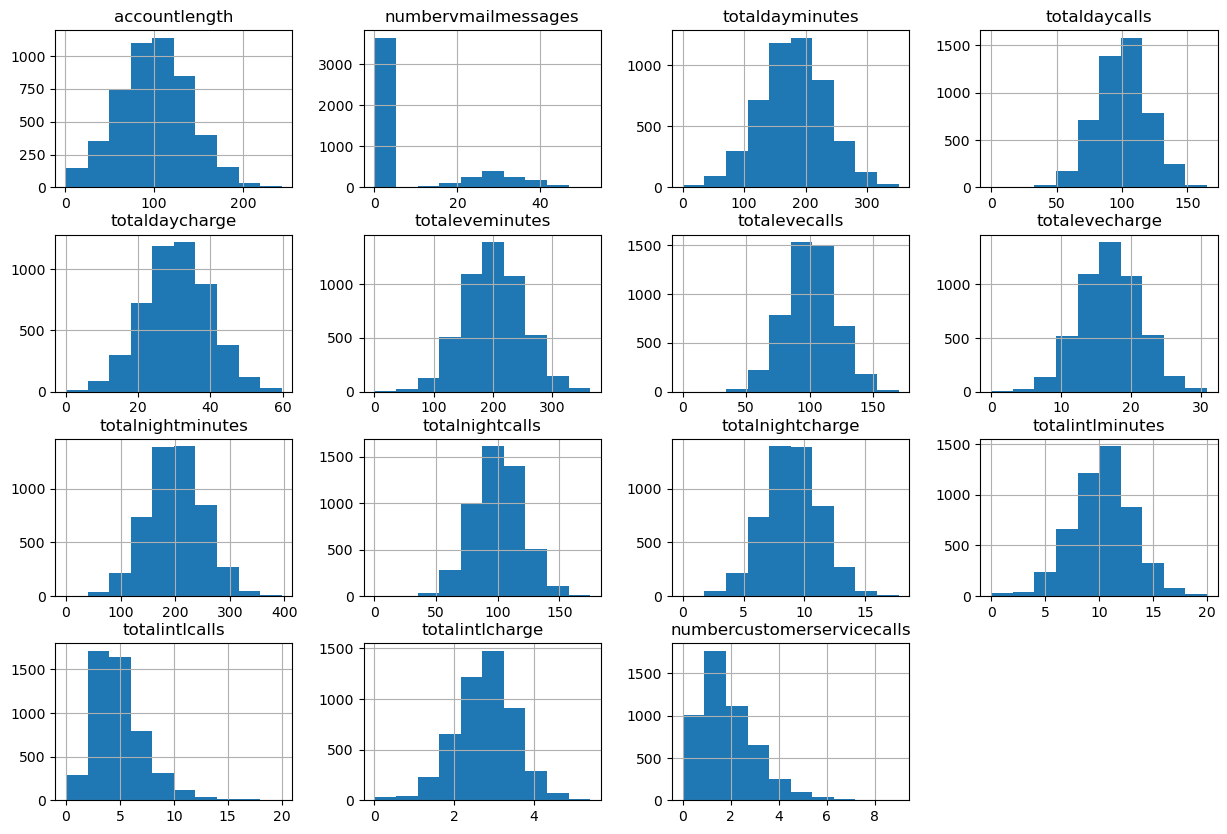

In [3]:
# Histogram for each continuous variable
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

Analyzing the histogram of the numerical varaibles we can see that most of them follow an almost normal distribution.

# Missing data

In [4]:
mv = np.where(pd.isnull(df))
print(f"rows with missing values: {len(np.unique(mv[0]))}\ntotal number of rows: {len(df)}")
print(f"percenteg of rows with missing values: {len(np.unique(mv[0]))/len(df)}")

rows with missing values: 793
total number of rows: 5000
percenteg of rows with missing values: 0.1586


We can see that there is a significant amount of missing data in the dataframe. We will implement multiple options to deal with missing data, including:

1. Dropping the rows with missing values;

2. Data imputation using the average or the most frequent value;

3. Data imputation using kNN.

Since we have a lot of missing data, dropping rows would not be an effective solution. Some of the attributes are left/right skewed, therefore imputing the average value might affect the distributions. We considered kNN as the most effective solution in this case, although we might reconsider after evaluating of the models.

In [5]:
# data imputation using average values
def avgImputer():
    numerical_cols = df.select_dtypes(include='number')
    imputer = SimpleImputer(strategy='mean')
    df[numerical_cols.columns] = imputer.fit_transform(numerical_cols)

    categorical_cols = df.select_dtypes(exclude='number')
    imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols.columns] = imputer.fit_transform(categorical_cols)

# dropping missing values
def dropValues():
    df = df.dropna()

# data imputation using knn
def knnImputer():
    numerical_cols = df.select_dtypes(include='number')
    imputer = KNNImputer(n_neighbors=2)
    df[numerical_cols.columns] = imputer.fit_transform(numerical_cols)

    categorical_cols = df.select_dtypes(exclude='number')
    imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols.columns] = imputer.fit_transform(categorical_cols)


knnImputer()

df.describe(include='all')

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,5000,5000.000000,5000,5000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
unique,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,No,NaN,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4293,NaN,4531,3688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,100.226660,NaN,NaN,7.77070,180.333678,100.033400,30.643167,200.633490,100.243400,17.054053,200.463720,99.908000,9.017409,10.265140,4.427800,2.772073,1.568800
std,NaN,39.651528,NaN,NaN,13.53024,53.790111,19.798611,9.152495,50.344162,19.792438,4.293719,50.339301,19.890587,2.272583,2.757769,2.440303,0.742526,1.301117
min,NaN,1.000000,NaN,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,73.000000,NaN,NaN,0.00000,143.700000,87.000000,24.430000,166.600000,87.000000,14.147500,167.100000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,NaN,100.000000,NaN,NaN,0.00000,180.100000,100.000000,30.600000,201.000000,100.000000,17.090000,200.500000,100.000000,9.015000,10.300000,4.000000,2.780000,1.000000
75%,NaN,127.000000,NaN,NaN,17.00000,216.025000,113.000000,36.750000,234.000000,114.000000,19.900000,234.525000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000


# Outliers

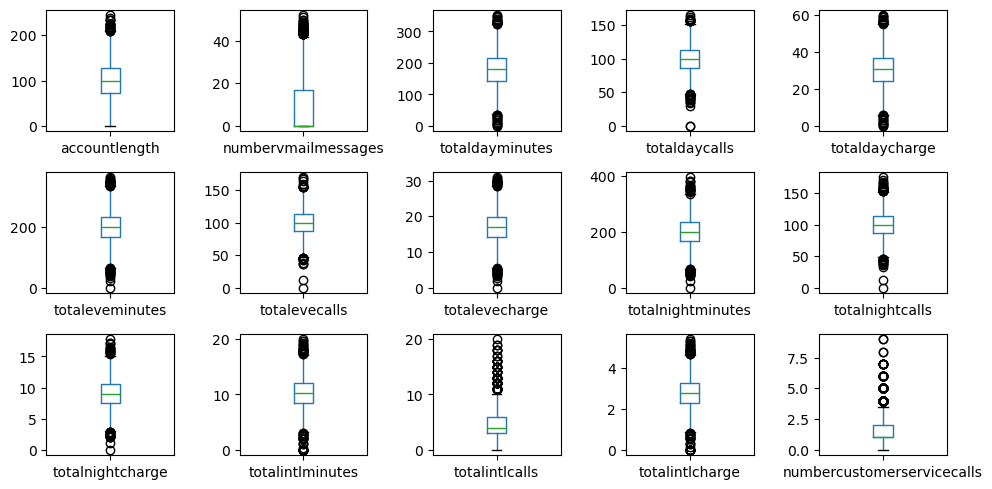

In [6]:
# Boxplots for each continuous variable
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 5))  
numerical_columns = df.select_dtypes(include=['float64']).columns
for i in range(len(numerical_columns)):
    df.boxplot(column=numerical_columns[i], ax=axes[i//5, i%5], grid=False)
plt.tight_layout()
plt.show()

In [7]:
numerical_columns = df.select_dtypes(include=['float64']).columns
z_scores = stats.zscore(df.loc[:,numerical_columns])
threshold = 3  # Adjustable threshold

# Find indices of outliers
outlier_indices = (abs(z_scores) > threshold).any(axis=1)

print(f"Number of rows with outliers: {np.sum(outlier_indices)}")
print(f"percentage of rows with outliers: {np.sum(outlier_indices)/len(df)}")


Number of rows with outliers: 260
percentage of rows with outliers: 0.052


As we have a small number of rows with outliers so we decided to drop those rows.

In [8]:
df = df[~outlier_indices]
df.describe()

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000
mean,99.872922,7.668354,180.720601,100.095886,30.708243,200.740316,100.295781,17.067363,200.444958,99.869198,9.016412,10.319525,4.319937,2.786921,1.522679
std,39.241243,13.409392,53.083116,19.497616,9.034007,49.627261,19.557145,4.227306,49.589950,19.515015,2.239334,2.623154,2.142284,0.706234,1.206852
min,1.000000,0.000000,19.500000,42.000000,3.320000,52.900000,42.000000,4.500000,50.100000,42.000000,2.250000,2.000000,1.000000,0.570000,0.000000
25%,73.000000,0.000000,144.100000,87.000000,24.498750,166.775000,87.000000,14.177500,167.200000,87.000000,7.510000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,0.000000,180.100000,100.000000,30.610000,201.000000,101.000000,17.090000,200.500000,100.000000,9.020000,10.400000,4.000000,2.810000,1.000000
75%,126.000000,16.000000,216.625000,113.000000,36.840000,233.900000,114.000000,19.882500,234.625000,113.000000,10.560000,12.100000,6.000000,3.270000,2.000000
max,217.000000,48.000000,338.400000,158.000000,57.530000,351.600000,159.000000,29.890000,350.200000,159.000000,15.760000,18.400000,11.000000,4.970000,5.000000


# Data correlation

Now we will take a look at the correlation of the variables with each other and with our target variable.

<AxesSubplot:>

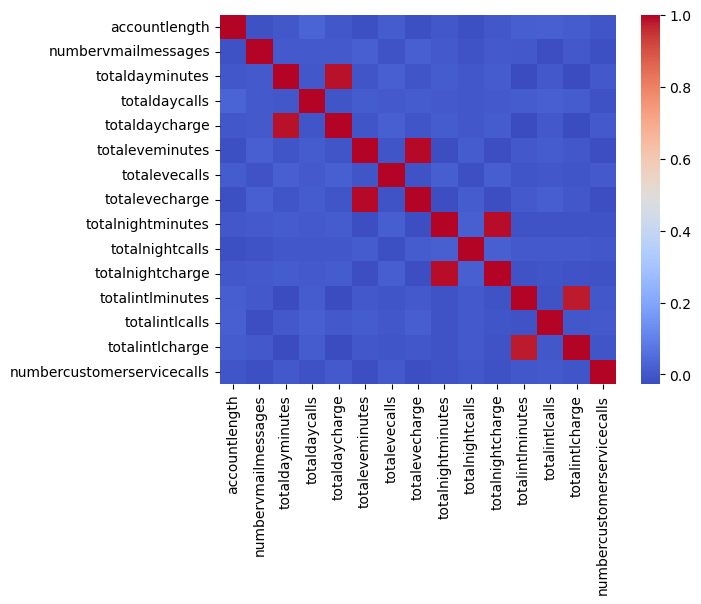

In [9]:
numerical_columns = df.select_dtypes(include=['float64']).columns
string_columns = df.select_dtypes(exclude=['float64']).columns
corr_matrix =  df.loc[:,numerical_columns].corr()
sns.heatmap(corr_matrix, cmap='coolwarm')

As we can see there is some variables with a high correlation with each other:
* totaldayminutes-totaldaycharge
* totalevecharge-totaleveminutes
* totalnightcharge-totalnightminutes
* totalintlcharge-totalintlminutes

To each of this pair of variables we will analyze the correlation with the target variable and drop the variable with the least correlation in order to not have repeated data in our analysis.

In [10]:
corr = {}

for col in string_columns:

    contingency_table = pd.crosstab(df['churn'], df[col])

    chi2, p, _, _ = stats.chi2_contingency(contingency_table)
    corr[col] = p

churn = df['churn'].map({
    'Yes': 0,
    'No' : 1
})


for col in numerical_columns:

    correlation, p = stats.pointbiserialr(df[col], churn)
    corr[col] = p


vars = [('totaldayminutes','totaldaycharge'),('totalevecharge','totaleveminutes'),('totalnightcharge','totalnightminutes'),('totalintlcharge','totalintlminutes')]

for var in vars:
    if corr[var[0]] < corr[var[1]]:
        df = df.drop([var[0]], axis=1)
    else : 
        df = df.drop([var[1]], axis=1)

df.describe(include='all')

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,4740,4740.000000,4740,4740,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000
unique,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,No,NaN,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4094,NaN,4293,3507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,99.872922,NaN,NaN,7.668354,180.720601,100.095886,100.295781,17.067363,200.444958,99.869198,4.319937,2.786921,1.522679
std,NaN,39.241243,NaN,NaN,13.409392,53.083116,19.497616,19.557145,4.227306,49.589950,19.515015,2.142284,0.706234,1.206852
min,NaN,1.000000,NaN,NaN,0.000000,19.500000,42.000000,42.000000,4.500000,50.100000,42.000000,1.000000,0.570000,0.000000
25%,NaN,73.000000,NaN,NaN,0.000000,144.100000,87.000000,87.000000,14.177500,167.200000,87.000000,3.000000,2.320000,1.000000
50%,NaN,100.000000,NaN,NaN,0.000000,180.100000,100.000000,101.000000,17.090000,200.500000,100.000000,4.000000,2.810000,1.000000
75%,NaN,126.000000,NaN,NaN,16.000000,216.625000,113.000000,114.000000,19.882500,234.625000,113.000000,6.000000,3.270000,2.000000


# Binary varaibles
In order to be used in some models we need all variables to be numerical so we will transform our binary variables in numerical data.

In [11]:
df['internationalplan'] = df['internationalplan'].map({
    'yes': 0,
    'no' : 1
})

df['voicemailplan'] = df['voicemailplan'].map({
    'yes': 0,
    'no' : 1
})

# Data scaling
Some models work better if our data is all in the same scale so in this step we will scale our data.

In [12]:
numerical_columns = df.select_dtypes(include=['float64']).columns

minMaxScaler = MinMaxScaler()
minMaxScaler.fit(df.loc[:,numerical_columns])
df.loc[:,numerical_columns] = minMaxScaler.transform(df.loc[:,numerical_columns])

df.describe()

,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000
mean,0.457745,0.905696,0.739873,0.159757,0.505552,0.500827,0.498255,0.494973,0.500983,0.494609,0.331994,0.503846,0.304536
std,0.181672,0.292282,0.438750,0.279362,0.166457,0.168083,0.167155,0.166495,0.165245,0.166795,0.214228,0.160508,0.241370
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,1.000000,0.000000,0.000000,0.390718,0.387931,0.384615,0.381154,0.390203,0.384615,0.200000,0.397727,0.200000
50%,0.458333,1.000000,1.000000,0.000000,0.503606,0.500000,0.504274,0.495865,0.501166,0.495726,0.300000,0.509091,0.200000
75%,0.578704,1.000000,1.000000,0.333333,0.618140,0.612069,0.615385,0.605849,0.614878,0.606838,0.500000,0.613636,0.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data splitting
Here we split ou data into train and test data to be used on our models

In [13]:
numerical_columns = df.select_dtypes(include=['float64','int']).columns

x = df[numerical_columns]
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Handling Imbalanced Data

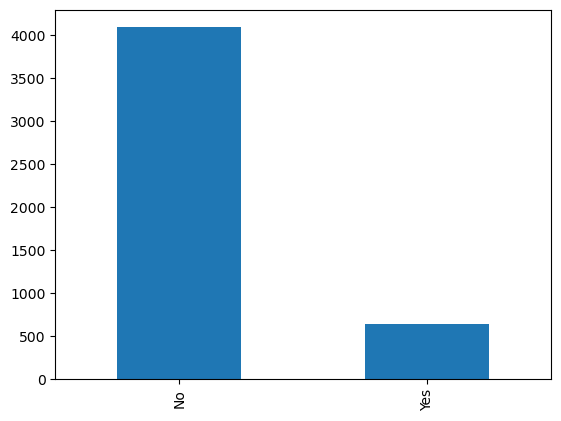

No     4094
Yes     646
Name: churn, dtype: int64

In [14]:
df['churn'].value_counts().plot.bar()
plt.show()

df['churn'].value_counts()

As we can see we have a higly unbalanced target variable.

Some models work better when our target variables have a similar number of cases in each class, in order to transform our data to get that scenario we thought of two approaches: over-sampling our data and under-sampling our data. In the code bellow we have both implementations, later we will analyze wich one gives us the best results for our models.

In [15]:
ros = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

# Display class distribution after oversampling
print("\nClass distribution after oversampling:")
print(pd.Series(y_oversampled).value_counts())

# Apply RandomUnderSampler to address class imbalance
rus = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

# Display class distribution after undersampling
print("\nClass distribution after undersampling:")
print(pd.Series(y_undersampled).value_counts())


Class distribution after oversampling:
No     3273
Yes    3273
Name: churn, dtype: int64

Class distribution after undersampling:
No     519
Yes    519
Name: churn, dtype: int64


# Models

In [116]:
def evaluate(model):
    predictions = model.predict(X_test)

    cm = metrics.confusion_matrix(y_test, predictions)

    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    total = tp + tn + fp + fn
    recall = tp/(tp+fn)
    precision = tp/(tp+fp)

    print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")

    print(f"Accuracy: {(tp+tn)/total}")
    print(f"Error: {1-(tp+tn)/total}")
    print(f"Recall: {recall}")
    print(f"Specificity: {tn/(tn+fp)}")
    print(f"Precision: {precision}")
    print(f"F1: {2*recall*precision/(recall+precision)}")

## Balanced Data
### KNN

In [64]:
params = {
    'n_neighbors': [3,5,7,9,11,13],
    'weights': ['uniform', 'distance'],
    'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
    'p' : [1,2,3,4,5]
    }


clf_accuracy = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,cv=5,n_jobs=10,verbose=1,scoring='accuracy')
clf_accuracy.fit(X_undersampled,y_undersampled)

print(clf_accuracy.best_params_)
knn_accuracy = KNeighborsClassifier(**clf_accuracy.best_params_) 

f1 = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average='micro')

clf_f1 = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,cv=5,n_jobs=10,verbose=1,scoring=f1)
clf_f1.fit(X_undersampled,y_undersampled)

print(clf_f1.best_params_)
knn_f1 = KNeighborsClassifier(n_neighbors=clf_f1.best_params_['n_neighbors'], weights=clf_f1.best_params_['weights'], algorithm=clf_f1.best_params_['algorithm'], p=clf_f1.best_params_['p']) 

combi_knn = VotingClassifier(estimators=[('acc', knn_accuracy), ('f1', knn_f1)], voting='soft')

Fitting 5 folds for each of 180 candidates, totalling 900 fits


{'algorithm': 'ball_tree', 'n_neighbors': 13, 'p': 1, 'weights': 'distance'}
Fitting 5 folds for each of 180 candidates, totalling 900 fits
{'algorithm': 'ball_tree', 'n_neighbors': 13, 'p': 1, 'weights': 'distance'}


In [65]:
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(knn_accuracy, x, y, cv=cv_strategy, scoring='accuracy')

print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.88818565 0.90084388 0.87447257 0.88818565 0.89451477]
Mean Accuracy: 0.889240506329114
Standard Deviation: 0.008749553313640367


In [66]:
knn_accuracy.fit(X_undersampled,y_undersampled)

yhat = knn_accuracy.predict(X_test)

evaluate(knn_accuracy)

TP: 94, TN: 718, FP: 103, FN: 33
Accuracy: 0.8565400843881856
Error: 0.14345991561181437
Recall: 0.7401574803149606
Specificity: 0.8745432399512789
Precision: 0.47715736040609136
F1: 0.5802469135802469


The k-Nearest Neighbors (KNN) model achieved an overall accuracy of approximately 85.65% on the test set, showcasing its ability to correctly classify instances. The recall score of 74.02% indicates that the model effectively identified about three-fourths of the actual positive cases, demonstrating its sensitivity. On the other hand, the precision of 47.72% suggests that when the model predicted positive, it was correct only about 47% of the time. The F1 score, a harmonic mean of precision and recall, stands at 58.02%, providing a balanced measure of the model's performance. The confusion matrix reveals 691 true negatives, 130 false positives, 33 false negatives, and 94 true positives. The model excelled in recognizing true negatives but struggled with false positives, impacting precision. Fine-tuning the model or exploring other algorithms might be considered to enhance performance, particularly in reducing false positives and improving precision. Additionally, the interplay between precision and recall emphasizes the need for a nuanced understanding of the model's strengths and weaknesses in the context of the specific application.

### Naive Bayes

The Naive Bayes works under such assumptions that are best kept if the size of the dataset is large. Therefore, while balancing the classes, we will choose to do oversampling. We initially define a function to use for evaluation.

We have to choose an algorithm for Naive Bayes. In this case, we have both continuous and categorical variables. We will start by using only the continuous variables and use Gaussian Naive Bayes. Since these models do not require any significant hyperparameters, we will use a simple holdout technique to evaluate them. 

In [67]:
gnb=GaussianNB()
gnb.fit(X_oversampled,y_oversampled)
evaluate(gnb)

TP: 100, TN: 640, FP: 181, FN: 27
Accuracy: 0.7805907172995781
Error: 0.21940928270042193
Recall: 0.7874015748031497
Specificity: 0.7795371498172959
Precision: 0.35587188612099646
F1: 0.49019607843137253


The overall model is not great and there may be better alternatives to use on this dataset than the Naive Bayes algorithm. This may be due to the fact that the naive bayes is a very simple model, and may not be adequate for this particular dataset. Specifically, this algorithm assumes independence between features given the class, and this assumption may not be met. Besides that, since we are using gaussian naive bayes, we are also assuming a gaussian distribution for the attributes, which we have also seen is not completely correct for this dataset.

### SVM

Now we will do a grid search over a set of parameters to find out what are the best hyperparameters for accuracy and for F1-Score. We will use undersampling to deal with unbalanced data since SVM is heavily based on only a few points (the support vectors) and this will reduce the run time significantly.

In [68]:
params = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['auto', 'scale', 0.1, 1],
    'degree': [2, 3, 4],
    }

clf_accuracy = GridSearchCV(estimator=SVC(),param_grid=params,cv=5,n_jobs=10,verbose=1,scoring='accuracy')
clf_accuracy.fit(X_undersampled,y_undersampled)

print(clf_accuracy.best_params_)
svc_accuracy = SVC(**clf_accuracy.best_params_) 

f1 = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average='micro')

clf_f1 = GridSearchCV(estimator=SVC(),param_grid=params,cv=5,n_jobs=10,verbose=1,scoring=f1)
clf_f1.fit(X_undersampled,y_undersampled)

print(clf_f1.best_params_)
svc_f1 = SVC(**clf_accuracy.best_params_) 

combi_svc = VotingClassifier(estimators=[('acc', svc_accuracy), ('f1', svc_f1)], voting='soft')

Fitting 5 folds for each of 192 candidates, totalling 960 fits


{'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
Fitting 5 folds for each of 192 candidates, totalling 960 fits
{'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}


The best hyperparameters ended up being the same for both the accuracy and F1 models. We will evaluate this model.

In [117]:
#Best Results for Acc and F1: Kernel = RBF, C = 10, Gamma = 1, Degree = 2

svm = SVC(kernel='rbf', C=10, gamma=1, degree=2)
svm.fit(X_undersampled, y_undersampled)
evaluate(svm)

TP: 99, TN: 715, FP: 106, FN: 28
Accuracy: 0.8586497890295358
Error: 0.14135021097046419
Recall: 0.7795275590551181
Specificity: 0.8708891595615104
Precision: 0.48292682926829267
F1: 0.5963855421686747


Overall, the SVM has a high accuracy, but a disappointing F1-Score. This may mean that the SVM did not do a good job dealing with unbalanced classes. This may be due to the choice of kernel, perhaps different kernels would be more adequate for this dataset. However, for the tested kernels, this seemed to be the best.

### NN

In [70]:
params = {
    'hidden_layer_sizes': [(100,), (50, 50), (25, 25, 25)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01],
    'batch_size': [16, 32, 64],
    'max_iter': [9999999999]
    }

clf_accuracy = GridSearchCV(estimator=MLPClassifier(),param_grid=params,cv=5,n_jobs=10,verbose=1,scoring='accuracy')
clf_accuracy.fit(X_oversampled,y_oversampled)

print(clf_accuracy.best_params_)
nn_accuracy = MLPClassifier(**clf_accuracy.best_params_) 

f1 = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average='micro')

clf_f1 = GridSearchCV(estimator=MLPClassifier(),param_grid=params,cv=5,n_jobs=10,verbose=1,scoring=f1)
clf_f1.fit(X_oversampled,y_oversampled)

print(clf_f1.best_params_)
nn_f1 = MLPClassifier(**clf_f1.best_params_) 

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 64, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'max_iter': 9999999999, 'solver': 'adam'}
Fitting 5 folds for each of 486 candidates, totalling 2430 fits
{'activation': 'tanh', 'alpha': 0.001, 'batch_size': 64, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'max_iter': 9999999999, 'solver': 'adam'}


In [71]:
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(nn_accuracy, x, y, cv=cv_strategy, scoring='accuracy')

print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)


cross_val_scores = cross_val_score(nn_f1, x, y, cv=cv_strategy, scoring=f1)

print("Cross-Validation Scores:", cross_val_scores)
print("Mean f1:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.92721519 0.93037975 0.94303797 0.94514768 0.95886076]
Mean Accuracy: 0.940928270042194
Standard Deviation: 0.011341502156722059
Cross-Validation Scores: [0.94198312 0.94409283 0.94409283 0.93881857 0.95253165]
Mean f1: 0.9443037974683544
Standard Deviation: 0.004544442875218989


In [72]:
nn_accuracy.fit(X_oversampled,y_oversampled)
print("Accuracy model")
evaluate(nn_accuracy)

nn_f1.fit(X_oversampled,y_oversampled)
print("f1 model")
evaluate(nn_f1)

Accuracy model
TP: 84, TN: 794, FP: 27, FN: 43
Accuracy: 0.9261603375527426
Error: 0.07383966244725737
Recall: 0.6614173228346457
Specificity: 0.9671132764920828
Precision: 0.7567567567567568
F1: 0.7058823529411766
f1 model
TP: 86, TN: 784, FP: 37, FN: 41
Accuracy: 0.9177215189873418
Error: 0.08227848101265822
Recall: 0.6771653543307087
Specificity: 0.9549330085261876
Precision: 0.6991869918699187
F1: 0.6880000000000001


The neural network model exhibited strong overall performance on the test set with an accuracy of approximately 92.62%. The recall score of 66.14% indicates that the model successfully identified a substantial portion of the actual positive instances, demonstrating its sensitivity to the target class. The precision of 75.67% reflects that when the model predicted positive, it was correct nearly three-quarters of the time, illustrating a balanced precision-recall trade-off. The F1 score, a harmonic mean of precision and recall, stands at 70.05%, indicating a robust balance between precision and recall. The model excelled in minimizing false positives, contributing to the higher precision, but at the expense of a slightly lower recall. Overall, the neural network demonstrates strong discriminatory power and generalization to unseen data. Further optimization or exploration of hyperparameters might enhance specific aspects of its performance, but the current results showcase its effectiveness in the binary classification task.

### Decision Tree

In [73]:
# Define the parameter grid for Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier = DecisionTreeClassifier(random_state=42)
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)
f1 = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average='micro')

# Accuracy
grid_dt_accuracy = GridSearchCV(estimator=dt_classifier, param_grid=dt_params, cv=cv_strategy, n_jobs=10, verbose=1, scoring='accuracy')
grid_dt_accuracy.fit(X_oversampled, y_oversampled)
print("Best Parameters for Accuracy:", grid_dt_accuracy.best_params_)

# F1 Score
grid_dt_f1 = GridSearchCV(estimator=dt_classifier, param_grid=dt_params, cv=cv_strategy, n_jobs=10, verbose=1, scoring=f1)
grid_dt_f1.fit(X_oversampled, y_oversampled)
print("Best Parameters for F1 Score:", grid_dt_f1.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters for Accuracy: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters for F1 Score: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


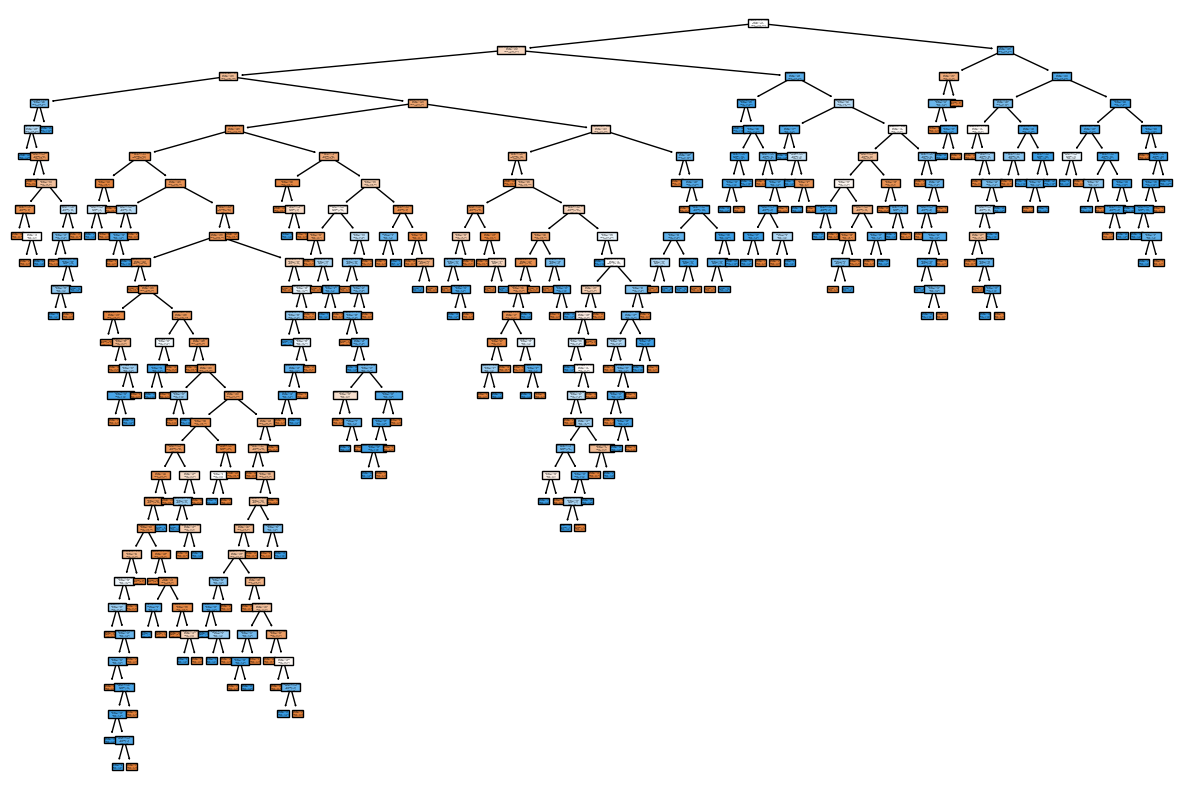

In [74]:
best_dt_model = grid_dt_accuracy.best_estimator_

# Visualization
plt.figure(figsize=(15, 10))
tree.plot_tree(best_dt_model, filled=True, feature_names=X_oversampled.columns, class_names=df['churn'].unique())
plt.show()

In [75]:
dt_accuracy = DecisionTreeClassifier(**grid_dt_accuracy.best_params_)
dt_accuracy.fit(X_oversampled,y_oversampled)
print("Accuracy model")
evaluate(dt_accuracy)

dt_f1 = DecisionTreeClassifier(**grid_dt_f1.best_params_)
dt_f1.fit(X_oversampled,y_oversampled)
print("f1 model")
evaluate(dt_f1)


Accuracy model
TP: 82, TN: 780, FP: 41, FN: 45
Accuracy: 0.9092827004219409
Error: 0.09071729957805907
Recall: 0.6456692913385826
Specificity: 0.9500609013398295
Precision: 0.6666666666666666
F1: 0.6559999999999999
f1 model
TP: 83, TN: 777, FP: 44, FN: 44
Accuracy: 0.9071729957805907
Error: 0.09282700421940926
Recall: 0.6535433070866141
Specificity: 0.9464068209500609
Precision: 0.6535433070866141
F1: 0.6535433070866141


### Tree ensemble

In [76]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None, 1, 2, 3],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}

# RandomForestClassifier
grid_rf_accuracy = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=5, n_jobs=10, verbose=1, scoring='accuracy')
grid_rf_accuracy.fit(X_oversampled, y_oversampled)

print(grid_rf_accuracy.best_params_)

rf_accuracy = RandomForestClassifier(**grid_rf_accuracy.best_params_)

f1_scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, pos_label='Yes')

grid_rf_f1 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=5, n_jobs=10, verbose=1, scoring=f1_scorer)
grid_rf_f1.fit(X_oversampled, y_oversampled)

rf_f1 = RandomForestClassifier(**grid_rf_f1.best_params_)


Fitting 5 folds for each of 2592 candidates, totalling 12960 fits
{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


In [77]:
rf_accuracy.fit(X_oversampled,y_oversampled)
print("Accuracy model")
evaluate(rf_accuracy)

rf_f1.fit(X_oversampled,y_oversampled)
print("f1 model")
evaluate(rf_f1)

Accuracy model
TP: 45, TN: 817, FP: 4, FN: 82
Accuracy: 0.9092827004219409
Error: 0.09071729957805907
Recall: 0.3543307086614173
Specificity: 0.9951278928136419
Precision: 0.9183673469387755
F1: 0.5113636363636364
f1 model
TP: 46, TN: 820, FP: 1, FN: 81
Accuracy: 0.9135021097046413
Error: 0.0864978902953587
Recall: 0.36220472440944884
Specificity: 0.9987819732034104
Precision: 0.9787234042553191
F1: 0.528735632183908


## Unbalenced

### KNN

In [79]:
params = {
    'n_neighbors': [3,5,7,9,11,13],
    'weights': ['uniform', 'distance'],
    'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
    'p' : [1,2,3,4,5]
    }


clf_accuracy = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,cv=5,n_jobs=10,verbose=1,scoring='accuracy')
clf_accuracy.fit(X_train,y_train)

print(clf_accuracy.best_params_)
knn_accuracy_unbalenced = KNeighborsClassifier(**clf_accuracy.best_params_) 

f1 = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average='micro')

clf_f1 = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,cv=5,n_jobs=10,verbose=1,scoring=f1)
clf_f1.fit(X_train,y_train)

print(clf_f1.best_params_)
knn_f1_unbalenced = KNeighborsClassifier(n_neighbors=clf_f1.best_params_['n_neighbors'], weights=clf_f1.best_params_['weights'], algorithm=clf_f1.best_params_['algorithm'], p=clf_f1.best_params_['p']) 

Fitting 5 folds for each of 180 candidates, totalling 900 fits


{'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
Fitting 5 folds for each of 180 candidates, totalling 900 fits
{'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


In [80]:
knn_accuracy_unbalenced.fit(X_train,y_train)

yhat = knn_accuracy_unbalenced.predict(X_test)

evaluate(knn_accuracy_unbalenced)

TP: 36, TN: 812, FP: 9, FN: 91
Accuracy: 0.8945147679324894
Error: 0.10548523206751059
Recall: 0.28346456692913385
Specificity: 0.9890377588306942
Precision: 0.8
F1: 0.4186046511627907


### Naive Bayes

In [81]:
gnb_unbalenced=GaussianNB()
gnb_unbalenced.fit(X_train,y_train)
evaluate(gnb_unbalenced)

TP: 50, TN: 775, FP: 46, FN: 77
Accuracy: 0.870253164556962
Error: 0.129746835443038
Recall: 0.3937007874015748
Specificity: 0.9439707673568819
Precision: 0.5208333333333334
F1: 0.4484304932735426


### SVM

In [82]:
params = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['auto', 'scale', 0.1, 1],
    'degree': [2, 3, 4],
    }

clf_accuracy = GridSearchCV(estimator=SVC(),param_grid=params,cv=5,n_jobs=10,verbose=1,scoring='accuracy')
clf_accuracy.fit(X_train,y_train)

print(clf_accuracy.best_params_)
svc_accuracy_unbalenced = SVC(**clf_accuracy.best_params_) 

f1 = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average='micro')

clf_f1 = GridSearchCV(estimator=SVC(),param_grid=params,cv=5,n_jobs=10,verbose=1,scoring=f1)
clf_f1.fit(X_train,y_train)

print(clf_f1.best_params_)
svc_f1_unbalenced = SVC(**clf_accuracy.best_params_) 

Fitting 5 folds for each of 192 candidates, totalling 960 fits
{'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
Fitting 5 folds for each of 192 candidates, totalling 960 fits
{'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}


In [83]:
svc_accuracy_unbalenced.fit(X_train,y_train)
yhat = svc_accuracy_unbalenced.predict(X_test)
print("accuracy")
evaluate(svc_accuracy_unbalenced)

svc_f1_unbalenced.fit(X_train,y_train)
yhat = svc_f1_unbalenced.predict(X_test)
print("f1")
evaluate(svc_f1_unbalenced)

accuracy
TP: 74, TN: 804, FP: 17, FN: 53
Accuracy: 0.9261603375527426
Error: 0.07383966244725737
Recall: 0.5826771653543307
Specificity: 0.9792935444579781
Precision: 0.8131868131868132
F1: 0.6788990825688073
f1
TP: 74, TN: 804, FP: 17, FN: 53
Accuracy: 0.9261603375527426
Error: 0.07383966244725737
Recall: 0.5826771653543307
Specificity: 0.9792935444579781
Precision: 0.8131868131868132
F1: 0.6788990825688073


### NN

In [84]:
params = {
    'hidden_layer_sizes': [(100,), (50, 50), (25, 25, 25)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01],
    'batch_size': [16, 32, 64],
    'max_iter': [9999999999]
    }

clf_accuracy = GridSearchCV(estimator=MLPClassifier(),param_grid=params,cv=5,n_jobs=10,verbose=1,scoring='accuracy')
clf_accuracy.fit(X_train,y_train)

print(clf_accuracy.best_params_)
nn_accuracy_unbalenced = MLPClassifier(**clf_accuracy.best_params_) 

f1 = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average='micro')

clf_f1 = GridSearchCV(estimator=MLPClassifier(),param_grid=params,cv=5,n_jobs=10,verbose=1,scoring=f1)
clf_f1.fit(X_train,y_train)

print(clf_f1.best_params_)
nn_f1_unbalenced = MLPClassifier(**clf_f1.best_params_) 

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
{'activation': 'relu', 'alpha': 0.001, 'batch_size': 32, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'adaptive', 'max_iter': 9999999999, 'solver': 'adam'}
Fitting 5 folds for each of 486 candidates, totalling 2430 fits
{'activation': 'relu', 'alpha': 0.001, 'batch_size': 32, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'max_iter': 9999999999, 'solver': 'adam'}


In [85]:
nn_accuracy_unbalenced.fit(X_train,y_train)
print("Accuracy model")
evaluate(nn_accuracy_unbalenced)

nn_f1_unbalenced.fit(X_train,y_train)
print("f1 model")
evaluate(nn_f1_unbalenced)

Accuracy model
TP: 90, TN: 807, FP: 14, FN: 37
Accuracy: 0.9462025316455697
Error: 0.05379746835443033
Recall: 0.7086614173228346
Specificity: 0.9829476248477467
Precision: 0.8653846153846154
F1: 0.7792207792207791
f1 model
TP: 89, TN: 802, FP: 19, FN: 38
Accuracy: 0.939873417721519
Error: 0.060126582278481
Recall: 0.7007874015748031
Specificity: 0.976857490864799
Precision: 0.8240740740740741
F1: 0.7574468085106383


### Decision Tree

In [86]:
# Define the parameter grid for Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier = DecisionTreeClassifier(random_state=42)
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)
f1 = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average='micro')

# Accuracy
grid_dt_accuracy = GridSearchCV(estimator=dt_classifier, param_grid=dt_params, cv=cv_strategy, n_jobs=10, verbose=1, scoring='accuracy')
grid_dt_accuracy.fit(X_train, y_train)
print("Best Parameters for Accuracy:", grid_dt_accuracy.best_params_)

# F1 Score
grid_dt_f1 = GridSearchCV(estimator=dt_classifier, param_grid=dt_params, cv=cv_strategy, n_jobs=10, verbose=1, scoring=f1)
grid_dt_f1.fit(X_train, y_train)
print("Best Parameters for F1 Score:", grid_dt_f1.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters for Accuracy: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters for F1 Score: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}


In [87]:
dt_accuracy_unbalenced = DecisionTreeClassifier(**grid_dt_accuracy.best_params_)
dt_accuracy_unbalenced.fit(X_train, y_train)
print("Accuracy model")
evaluate(dt_accuracy_unbalenced)

dt_f1_unbalenced = DecisionTreeClassifier(**grid_dt_f1.best_params_)
dt_f1_unbalenced.fit(X_train, y_train)
print("f1 model")
evaluate(dt_f1_unbalenced)


Accuracy model
TP: 76, TN: 802, FP: 19, FN: 51
Accuracy: 0.9261603375527426
Error: 0.07383966244725737
Recall: 0.5984251968503937
Specificity: 0.976857490864799
Precision: 0.8
F1: 0.6846846846846847
f1 model
TP: 76, TN: 804, FP: 17, FN: 51
Accuracy: 0.9282700421940928
Error: 0.07172995780590719
Recall: 0.5984251968503937
Specificity: 0.9792935444579781
Precision: 0.8172043010752689
F1: 0.690909090909091


### Tree ensemble

In [88]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None, 1, 2, 3],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}

# RandomForestClassifier
grid_rf_accuracy = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=5, n_jobs=10, verbose=1, scoring='accuracy')
grid_rf_accuracy.fit(X_train, y_train)

print(grid_rf_accuracy.best_params_)

rf_accuracy_unbalenced = RandomForestClassifier(**grid_rf_accuracy.best_params_)

f1_scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, pos_label='Yes')

grid_rf_f1 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=5, n_jobs=10, verbose=1, scoring=f1_scorer)
grid_rf_f1.fit(X_train, y_train)

rf_f1_unbalenced = RandomForestClassifier(**grid_rf_f1.best_params_)


Fitting 5 folds for each of 2592 candidates, totalling 12960 fits
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


In [89]:
rf_accuracy_unbalenced.fit(X_train, y_train)
print("Accuracy model")
evaluate(rf_accuracy_unbalenced)

rf_f1_unbalenced.fit(X_train, y_train)
print("f1 model")
evaluate(rf_f1_unbalenced)

Accuracy model
TP: 82, TN: 811, FP: 10, FN: 45
Accuracy: 0.9419831223628692
Error: 0.058016877637130815
Recall: 0.6456692913385826
Specificity: 0.9878197320341048
Precision: 0.8913043478260869
F1: 0.7488584474885844
f1 model
TP: 79, TN: 809, FP: 12, FN: 48
Accuracy: 0.9367088607594937
Error: 0.06329113924050633
Recall: 0.6220472440944882
Specificity: 0.9853836784409257
Precision: 0.8681318681318682
F1: 0.724770642201835


# Evaluation of the models

In [118]:
results= [['name','accuracy','recall','prec','f1','mean']]
def evaluate_model(model,name,X_test,y_test,dec_number):
    yhat = model.predict(X_test)

    acc = round(sklearn.metrics.accuracy_score(y_test,yhat),dec_number)
    recall = round(sklearn.metrics.recall_score(y_test,yhat,pos_label='Yes'),dec_number)
    prec = round(sklearn.metrics.precision_score(y_test,yhat,pos_label='Yes'),dec_number)
    f1 = round(sklearn.metrics.f1_score(y_test,yhat,pos_label='Yes'),dec_number)
    mean = round((acc+recall+prec+f1)/4,dec_number)

    results.append([name,acc,recall,prec,f1,mean])
    
    
def print_results(results):
    # Print each row
    for row in results:
        row_str = " | ".join(str(element) for element in row)
        print(row_str)

## Balenced Data

In [119]:
evaluate_model(knn_accuracy,'knn_accuracy',X_test,y_test,3)
evaluate_model(gnb,'gnb',X_test,y_test,3)
evaluate_model(svm,'svm',X_test,y_test,3)
evaluate_model(nn_accuracy,'nn_accuracy',X_test,y_test,3)
evaluate_model(nn_f1,'nn_f1',X_test,y_test,3)
evaluate_model(dt_accuracy,'dt_classifier',X_test,y_test,3)
evaluate_model(dt_f1,'dt_f1',X_test,y_test,3)
evaluate_model(rf_accuracy,'rf_model',X_test,y_test,3)
evaluate_model(rf_f1,'rf_f1',X_test,y_test,3)
print_results(results)

NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Unbalenced Data

In [120]:
results= [['name','accuracy','recall','prec','f1','mean']]
evaluate_model(knn_accuracy_unbalenced,'knn_accuracy',X_test,y_test,3)
evaluate_model(gnb_unbalenced,'gnb',X_test,y_test,3)
evaluate_model(svc_accuracy_unbalenced,'svm_acc',X_test,y_test,3)
evaluate_model(svc_f1_unbalenced,'svm_f1',X_test,y_test,3)
evaluate_model(nn_accuracy_unbalenced,'nn_accuracy',X_test,y_test,3)
evaluate_model(nn_f1_unbalenced,'nn_f1',X_test,y_test,3)
evaluate_model(dt_accuracy_unbalenced,'dt_classifier',X_test,y_test,3)
evaluate_model(dt_f1_unbalenced,'dt_f1',X_test,y_test,3)
evaluate_model(rf_accuracy_unbalenced,'rf_model',X_test,y_test,3)
evaluate_model(rf_f1_unbalenced,'rf_f1',X_test,y_test,3)
print_results(results)

name | accuracy | recall | prec | f1 | mean
knn_accuracy | 0.895 | 0.283 | 0.8 | 0.419 | 0.599
gnb | 0.87 | 0.394 | 0.521 | 0.448 | 0.558
svm_acc | 0.926 | 0.583 | 0.813 | 0.679 | 0.75
svm_f1 | 0.926 | 0.583 | 0.813 | 0.679 | 0.75
nn_accuracy | 0.946 | 0.709 | 0.865 | 0.779 | 0.825
nn_f1 | 0.94 | 0.701 | 0.824 | 0.757 | 0.806
dt_classifier | 0.926 | 0.598 | 0.8 | 0.685 | 0.752
dt_f1 | 0.928 | 0.598 | 0.817 | 0.691 | 0.758
rf_model | 0.942 | 0.646 | 0.891 | 0.749 | 0.807
rf_f1 | 0.937 | 0.622 | 0.868 | 0.725 | 0.788


As we can see the results of the models trained with the unbalenced data is worse than the results of the ones trained with balenced data.

# Best Overall Model

The best overall model was the neural network built for accuracy with unbalanced data. Even though the SVM has also really good results, the NN had significantly better results for the recall and the F1-Score.

We can see that the Support Vector Machine had some issues dealing with the positive class. This is a problem with dealing with imbalanced datasets. However, even when we trained this model with a balanced dataset the recall and F1-Score were low (both with undersampling and oversampling). The SVM tries to find a hyperplane to separate the classes, using a specific kernel. For this case, it seems that the kernels did not find a good enough hyperplane that separated the data. Other kernels may have better results.

As for the neural network built for accuracy, the intricacy of this model may be the reason as to why it managed to do so well with the accuracy as well as the f1-score. It managed to have the highest f1-score out of all of the models, and overall the best model to handle the unbalanced data. In terms of accuracy, it managed to be the second best, and it would very likely be the one chosen to be deployed in a business environment. We would still need to be careful, since the f1-score was not very high, so it would need some care with maintenance.

## Confusion matrix for neural network

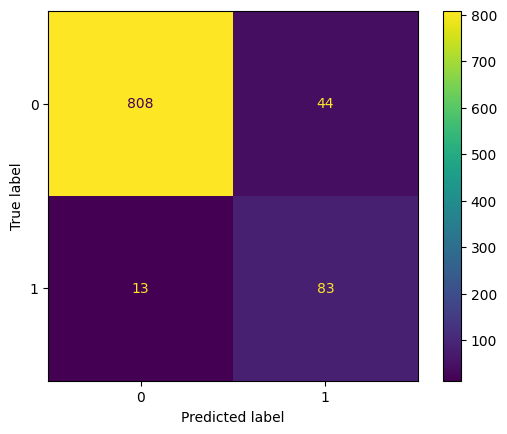

In [121]:
model = MLPClassifier(activation= 'relu', alpha= 0.001, batch_size= 32, hidden_layer_sizes= (25, 25, 25), learning_rate= 'adaptive', max_iter= 9999999999, solver= 'adam')
model.fit(X_train,y_train)

yhat = model.predict(X_test)

conf_matrix = sklearn.metrics.confusion_matrix(yhat,y_test)
disp = sklearn.metrics.ConfusionMatrixDisplay(conf_matrix)

disp.plot()
plt.show()


## Confusion matrix for SVM

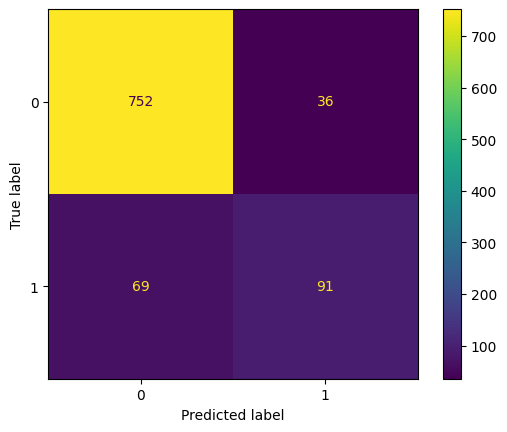

In [122]:
model = SVC(C= 10, degree= 2, gamma= 1, kernel= 'rbf')
model.fit(X_oversampled,y_oversampled)

yhat = model.predict(X_test)

conf_matrix = sklearn.metrics.confusion_matrix(yhat,y_test)
disp = sklearn.metrics.ConfusionMatrixDisplay(conf_matrix)

disp.plot()
plt.show()


# Model combination

Now we will analyze if combining the results of models can give us any improvement in performence.
We will use our three best models (SVM, Neural Networks and Rnadom Forest), combining the results of these models using two techniques hard (majority voting) and soft voting (weighted by predicted probabilities).

In [123]:
svm = SVC(kernel='rbf', C=10, gamma=1, degree=2, probability=True)
nn_accuracy = MLPClassifier(activation= 'relu', alpha= 0.001, batch_size= 32, hidden_layer_sizes= (50, 50), learning_rate= 'adaptive', max_iter= 9999999999, solver= 'adam')
rf_model = RandomForestClassifier(bootstrap=False, max_depth=30, max_features=1, min_samples_split=5, n_estimators=200)

In [124]:
models = [('svm',svm),('nn',nn_accuracy),('rf',rf_model)]
hard_voting_clf = VotingClassifier(models, voting='hard')
soft_voting_clf = VotingClassifier(models, voting='soft')

In [125]:
hard_voting_clf.fit(X_train,y_train)
evaluate_model(hard_voting_clf,'hard_voting_clf',X_test,y_test,3)
evaluate(hard_voting_clf)

TP: 77, TN: 811, FP: 10, FN: 50
Accuracy: 0.9367088607594937
Error: 0.06329113924050633
Recall: 0.6062992125984252
Specificity: 0.9878197320341048
Precision: 0.8850574712643678
F1: 0.719626168224299


In [126]:
soft_voting_clf.fit(X_train,y_train)
evaluate_model(soft_voting_clf,'soft_voting_clf',X_test,y_test,3)
evaluate(soft_voting_clf)

TP: 70, TN: 814, FP: 7, FN: 57
Accuracy: 0.9324894514767933
Error: 0.0675105485232067
Recall: 0.5511811023622047
Specificity: 0.9914738124238733
Precision: 0.9090909090909091
F1: 0.6862745098039216


In [127]:
print_results(results)

name | accuracy | recall | prec | f1 | mean
knn_accuracy | 0.895 | 0.283 | 0.8 | 0.419 | 0.599
gnb | 0.87 | 0.394 | 0.521 | 0.448 | 0.558
svm_acc | 0.926 | 0.583 | 0.813 | 0.679 | 0.75
svm_f1 | 0.926 | 0.583 | 0.813 | 0.679 | 0.75
nn_accuracy | 0.946 | 0.709 | 0.865 | 0.779 | 0.825
nn_f1 | 0.94 | 0.701 | 0.824 | 0.757 | 0.806
dt_classifier | 0.926 | 0.598 | 0.8 | 0.685 | 0.752
dt_f1 | 0.928 | 0.598 | 0.817 | 0.691 | 0.758
rf_model | 0.942 | 0.646 | 0.891 | 0.749 | 0.807
rf_f1 | 0.937 | 0.622 | 0.868 | 0.725 | 0.788
hard_voting_clf | 0.937 | 0.606 | 0.885 | 0.72 | 0.787
soft_voting_clf | 0.932 | 0.551 | 0.909 | 0.686 | 0.77


Analyzing the results we can see that combining the results of our best performing models does not improve the our results

|name | accuracy | recall | prec | f1 | mean|
|----|-----|----|----|----|----|
|svm | 0.926 | 0.583 | 0.813 | 0.679 | 0.75 |
|nn_accuracy | 0.946 | 0.709 | 0.865 | 0.779 | 0.825 |
|rf_model | 0.942 | 0.646 | 0.891 | 0.749 | 0.807 |
|hard_voting_clf | 0.937 | 0.606 | 0.885 | 0.72 | 0.787|
|soft_voting_clf | 0.932 | 0.551 | 0.909 | 0.686 | 0.77|


Neither the soft voting nor the hard voting tecnhiques imporoved the results over our best models.